In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

dataset_hotels_test = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_test.csv?raw=true')
dataset_hotels_train = pd.read_csv('https://github.com/joeldevel/data_tp1_odd/blob/main/hotels_train.csv?raw=true')

In [2]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [3]:
dataset_hotels_test_id = dataset_hotels_test['id'].copy()

## Preprocesamiento

### Basico fillna

In [4]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna(0).astype('int').astype('str')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna(0).astype('int').astype('str')

In [5]:
dataset_hotels_train.drop(['meal', 'is_repeated_guest','id','previous_bookings_not_canceled'], axis='columns', inplace=True)
dataset_hotels_test.drop(['meal', 'is_repeated_guest','id','previous_bookings_not_canceled'], axis='columns', inplace=True)

In [6]:
dataset_hotels_train['cant_personas'] = dataset_hotels_train['children'].fillna(0) + dataset_hotels_train['adults'].fillna(0) + dataset_hotels_train['babies'].fillna(0)
dataset_hotels_train.drop(['children', 'adults','babies'], axis='columns', inplace=True) 
dataset_hotels_test['cant_personas'] = dataset_hotels_test['children'].fillna(0) + dataset_hotels_test['adults'].fillna(0) + dataset_hotels_test['babies'].fillna(0)
dataset_hotels_test.drop(['children', 'adults','babies'], axis='columns', inplace=True) 

In [7]:
dataset_hotels_train['company'] = dataset_hotels_train['company'].fillna('ninguno')
dataset_hotels_test['company'] = dataset_hotels_test['company'].fillna('ninguno')

In [8]:
dataset_hotels_train['agent'] = dataset_hotels_train['agent'].fillna('desconocida')
dataset_hotels_test['agent'] = dataset_hotels_test['agent'].fillna('desconocida')

### Agrupo categorias con muchas categorias

In [9]:
# lista_company_mayoritarios = dataset_hotels_train['company'].value_counts().nlargest(1).index.tolist()
# dataset_hotels_train['company'] = pd.Series(np.where(~dataset_hotels_train['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_train['company']))
# dataset_hotels_test['company'] = pd.Series(np.where(~dataset_hotels_test['company'].isin(lista_company_mayoritarios), 'con compay', dataset_hotels_test['company']))

In [10]:
# lista_paises_mayoritarios = dataset_hotels_train['country'].value_counts().nlargest(10).index.tolist()
# dataset_hotels_train['country'] = pd.Series(np.where(~dataset_hotels_train['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_train['country']))
# dataset_hotels_test['country'] = pd.Series(np.where(~dataset_hotels_test['country'].isin(lista_paises_mayoritarios), 'Otro Pais', dataset_hotels_test['country']))

In [11]:
# lista_agent_mayoritarios = dataset_hotels_train['agent'].value_counts().nlargest(9).index.tolist()
# dataset_hotels_train['agent'] = pd.Series(np.where(~dataset_hotels_train['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_train['agent']))
# dataset_hotels_test['agent'] = pd.Series(np.where(~dataset_hotels_test['agent'].isin(lista_agent_mayoritarios), 'otra agencia', dataset_hotels_test['agent']))

### Convierto categorias a numericas

In [12]:
dataset_hotels_train['hotel'] = pd.Categorical(dataset_hotels_train['hotel']).codes
dataset_hotels_train['country'] = pd.Categorical(dataset_hotels_train['country']).codes
dataset_hotels_train['market_segment'] = pd.Categorical(dataset_hotels_train['market_segment']).codes
dataset_hotels_train['distribution_channel'] = pd.Categorical(dataset_hotels_train['distribution_channel']).codes
dataset_hotels_train['reserved_room_type'] = pd.Categorical(dataset_hotels_train['reserved_room_type']).codes
dataset_hotels_train['assigned_room_type'] = pd.Categorical(dataset_hotels_train['assigned_room_type']).codes
dataset_hotels_train['deposit_type'] = pd.Categorical(dataset_hotels_train['deposit_type']).codes
dataset_hotels_train['agent'] = pd.Categorical(dataset_hotels_train['agent']).codes
dataset_hotels_train['company'] = pd.Categorical(dataset_hotels_train['company']).codes
dataset_hotels_train['customer_type'] = pd.Categorical(dataset_hotels_train['customer_type']).codes
dataset_hotels_train['reservation_status_date'] = pd.Categorical(dataset_hotels_train['reservation_status_date']).codes
dataset_hotels_train['arrival_date_month'] = pd.Categorical(dataset_hotels_train['arrival_date_month']).codes

In [13]:
dataset_hotels_test['hotel'] = pd.Categorical(dataset_hotels_test['hotel']).codes
dataset_hotels_test['country'] = pd.Categorical(dataset_hotels_test['country']).codes
dataset_hotels_test['market_segment'] = pd.Categorical(dataset_hotels_test['market_segment']).codes
dataset_hotels_test['distribution_channel'] = pd.Categorical(dataset_hotels_test['distribution_channel']).codes
dataset_hotels_test['reserved_room_type'] = pd.Categorical(dataset_hotels_test['reserved_room_type']).codes
dataset_hotels_test['assigned_room_type'] = pd.Categorical(dataset_hotels_test['assigned_room_type']).codes
dataset_hotels_test['deposit_type'] = pd.Categorical(dataset_hotels_test['deposit_type']).codes
dataset_hotels_test['agent'] = pd.Categorical(dataset_hotels_test['agent']).codes
dataset_hotels_test['company'] = pd.Categorical(dataset_hotels_test['company']).codes
dataset_hotels_test['customer_type'] = pd.Categorical(dataset_hotels_test['customer_type']).codes
dataset_hotels_test['reservation_status_date'] = pd.Categorical(dataset_hotels_test['reservation_status_date']).codes
dataset_hotels_test['arrival_date_month'] = pd.Categorical(dataset_hotels_test['arrival_date_month']).codes

## Entrenamiento

In [30]:
#Creo conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(dataset_hotels_train.drop(['is_canceled'], axis='columns', inplace=False).values, dataset_hotels_train['is_canceled'].values, test_size=0.2, random_state=0)



In [15]:
#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

In [16]:
from sklearn.model_selection import GridSearchCV

# Split the data into features and target
X = dataset_hotels_train.drop(['is_canceled'], axis='columns', inplace=False)
y = dataset_hotels_train['is_canceled']

# Define the parameter grid for SVM
param_grid = {
    # 'C': [0.1, 1, 10],
    # 'kernel': ['linear', 'rbf'],
    # 'gamma': [0.01, 0.1, 1]
    'C': [1],
    'kernel': ['linear'],
    'gamma': [1]
}

# Create the SVM classifier
svm = SVC()

# Perform cross-validation with SVM and different parameter combinations
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Score: 0.8197953507077905


In [28]:
print(grid_search.best_estimator_)

SVC(C=1, gamma=1, kernel='linear')


In [33]:
y_predict_train = grid_search.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


F1-Score: 0.8089091369273602


Text(50.722222222222214, 0.5, 'True')

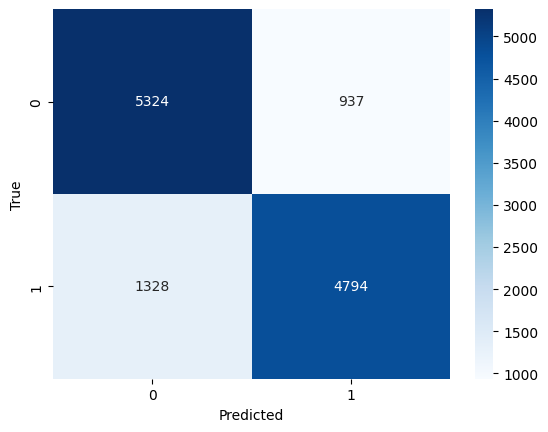

In [34]:
from sklearn.metrics import confusion_matrix, classification_report , f1_score
print('F1-Score: {}'.format(f1_score(y_test, y_predict_train, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_predict_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [17]:
y_pred = grid_search.predict(dataset_hotels_test)

In [21]:
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
from joblib import dump, load
dump(grid_search, 'svm_cv.joblib')

['svm_cv.joblib']

In [18]:
df_prediction = pd.DataFrame(zip(dataset_hotels_test_id,y_pred)).rename(columns={0: "id", 1: "is_canceled"})
df_prediction

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,0
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1
...,...,...
26530,636ccded-66ad-4538-8006-c0b9f84c6256,0
26531,11e19741-bd28-4459-8ea3-184f1664000f,0
26532,36a4c7b0-d6b1-4528-93db-311be96ec1c6,1
26533,89c85fa5-2b3d-4131-844c-e151a65ca240,1


In [35]:
dataset_hotels_train.to_csv('dataset_hotels_train.csv', index=False)

In [ ]:
dataset_hotels_test.to_csv('svm_cv_prediction.csv', index=False)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      6261
           1       0.75      0.72      0.74      6122

    accuracy                           0.75     12383
   macro avg       0.75      0.75      0.75     12383
weighted avg       0.75      0.75      0.75     12383



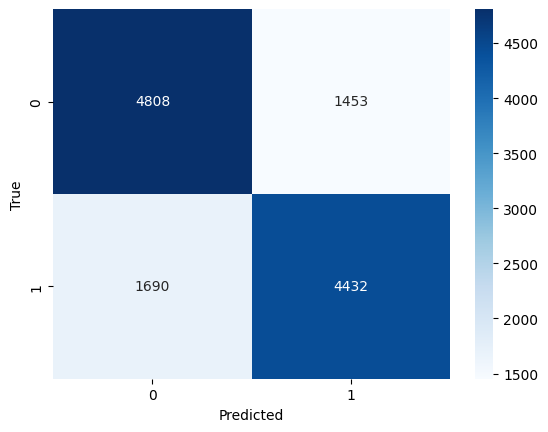

In [ ]:
# #Construyo un modelo SVM  
# svm = SVC()

# #Lo entreno con los datos sin escalar
# svm.fit(x_train, y_train)

# #Hago la prediccion y calculo las métricas
# y_pred=svm.predict(x_test)
# metricas(y_pred,y_test)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      6261
           1       0.84      0.81      0.83      6122

    accuracy                           0.83     12383
   macro avg       0.83      0.83      0.83     12383
weighted avg       0.83      0.83      0.83     12383



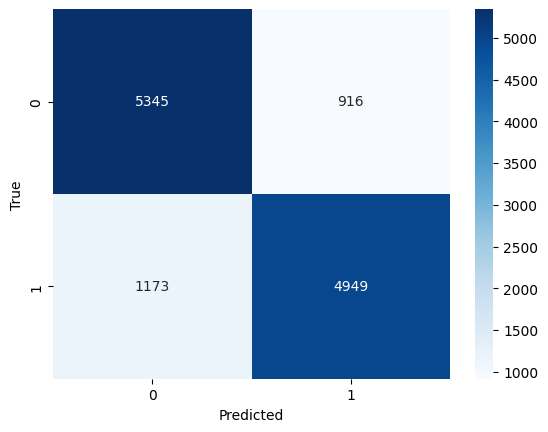

In [ ]:
#Construyo un modelo SVM  
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)
metricas(y_pred_norm,y_test)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      6261
           1       0.82      0.79      0.80      6122

    accuracy                           0.81     12383
   macro avg       0.81      0.81      0.81     12383
weighted avg       0.81      0.81      0.81     12383



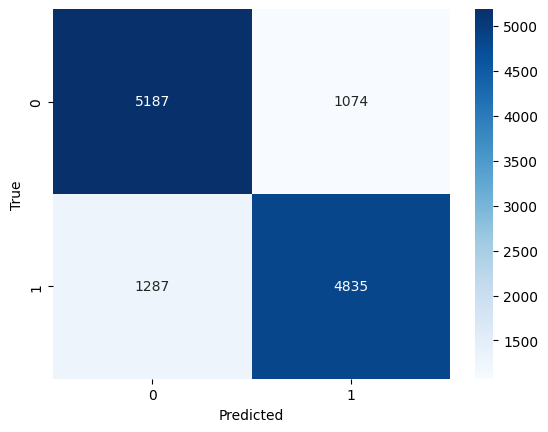

In [ ]:
#Construyo un modelo SVM  
svm_minmax= SVC()

#Lo entreno con los datos escalados con min max
svm_minmax.fit(x_train_minmax, y_train)

#Hago la prediccion y calculo las métricas
y_pred_minmax=svm_minmax.predict(x_test_minmax)
metricas(y_pred_minmax,y_test)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6261
           1       0.99      0.80      0.89      6122

    accuracy                           0.90     12383
   macro avg       0.92      0.90      0.90     12383
weighted avg       0.91      0.90      0.90     12383



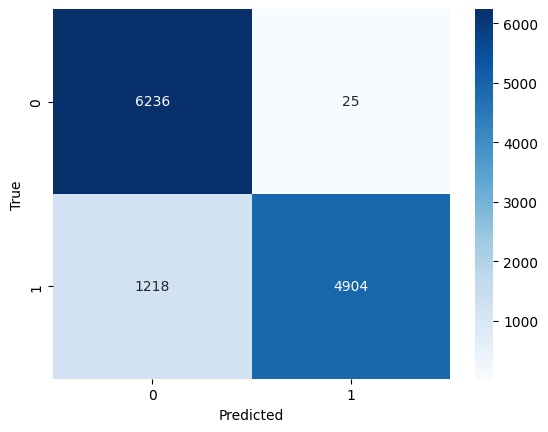

In [ ]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=1)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin_min_max =clf.predict(x_test_minmax)
metricas(y_pred_lin_min_max,y_test)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6261
           1       0.99      0.88      0.93      6122

    accuracy                           0.94     12383
   macro avg       0.94      0.94      0.94     12383
weighted avg       0.94      0.94      0.94     12383



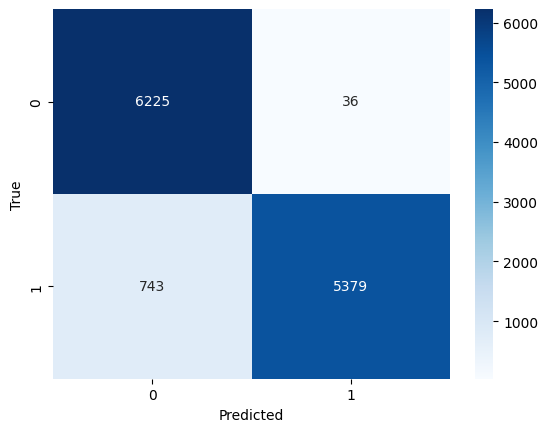

In [ ]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=0.5)
clf.fit(x_train_norm, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin_norm =clf.predict(x_test_norm)
metricas(y_pred_lin_norm,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.65      0.68      0.67      6261
           1       0.66      0.63      0.64      6122

    accuracy                           0.66     12383
   macro avg       0.66      0.65      0.65     12383
weighted avg       0.66      0.66      0.65     12383



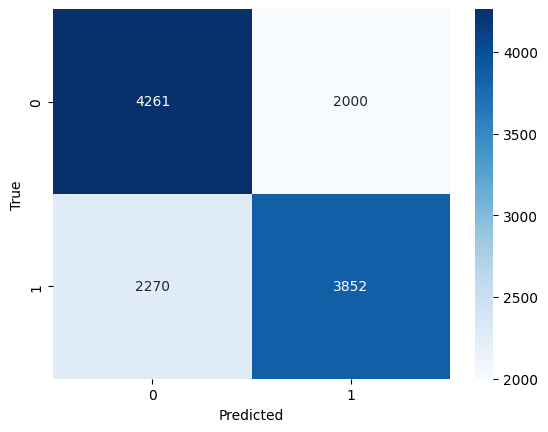

In [ ]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='poly', C=0.5, degree=3, gamma=10, coef0=10,max_iter = 10000, cache_size = 1000)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_pol_min_max=clf.predict(x_test_minmax)
metricas(y_pred_pol_min_max,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.76      0.34      0.47      6261
           1       0.57      0.89      0.69      6122

    accuracy                           0.61     12383
   macro avg       0.66      0.61      0.58     12383
weighted avg       0.66      0.61      0.58     12383



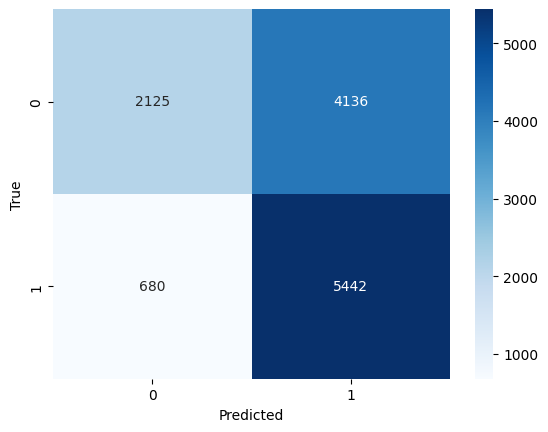

In [ ]:
#Creo un clasificador con kernel polinomico y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='poly', C=1, degree=2, gamma=10, coef0=10,max_iter = 10000, cache_size = 8000)
clf.fit(x_train_norm, y_train)

#Hago la predicción y calculo las métricas
y_pred_pol_norm=clf.predict(x_test_norm)
metricas(y_pred_pol_norm,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6261
           1       0.86      0.87      0.86      6122

    accuracy                           0.86     12383
   macro avg       0.86      0.86      0.86     12383
weighted avg       0.86      0.86      0.86     12383



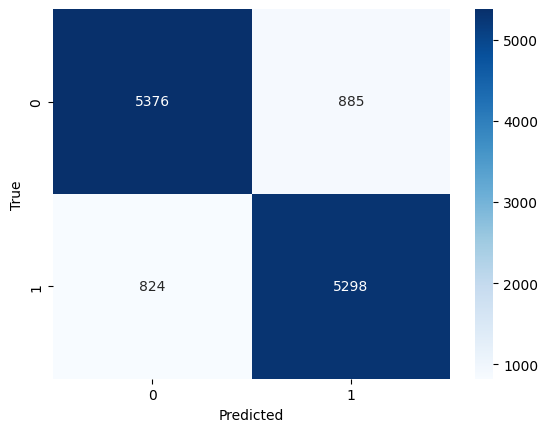

In [ ]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10,max_iter = 10000, cache_size = 8000)
clf.fit(x_train_minmax, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad_min_max=clf.predict(x_test_minmax)
metricas(y_pred_rad_min_max,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      0.90      0.82      6261
           1       0.87      0.68      0.76      6122

    accuracy                           0.79     12383
   macro avg       0.81      0.79      0.79     12383
weighted avg       0.81      0.79      0.79     12383



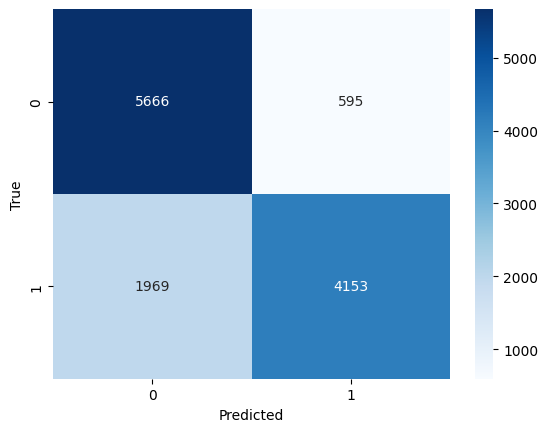

In [ ]:
#Creo un clasificador con kernel radial y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='rbf', C=5, gamma=10,max_iter = 10000, cache_size = 8000)
clf.fit(x_train_norm, y_train)

#Hago la predicción y calculo las métricas
y_pred_rad_norm=clf.predict(x_test_norm)
metricas(y_pred_rad_norm,y_test)

##Mejor Resultado -> Kaggle

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      6261
           1       0.99      0.88      0.93      6122

    accuracy                           0.94     12383
   macro avg       0.94      0.94      0.94     12383
weighted avg       0.94      0.94      0.94     12383



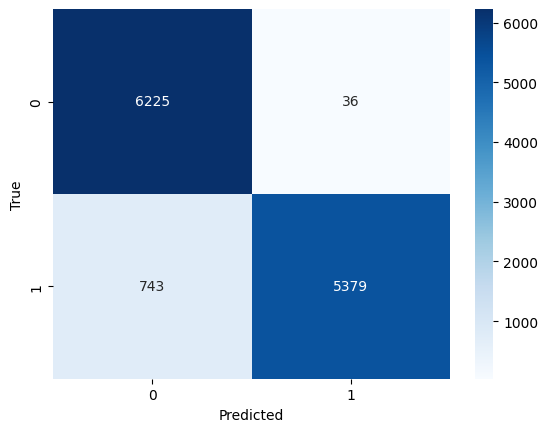

In [ ]:
#Creo un clasificador con kernel lineal y lo entreno sobre los datos escalados min-max
clf = SVC(kernel='linear', C=0.5)
clf.fit(x_train_norm, y_train)

#Hago la predicción y calculo las métricas
y_pred_lin_norm =clf.predict(x_test_norm)
metricas(y_pred_lin_norm,y_test)

In [ ]:
y_result_svc = clf.predict(min_max_scaler.transform(dataset_hotels_test.values))

In [ ]:
df_prediction_svm = pd.DataFrame(zip(dataset_hotels_test_id,y_result_svc)).rename(columns={0: "id", 1: "is_canceled"})

In [ ]:
df_prediction_svc.to_csv('svc_prediction.csv', index=False)